
<h1 align=center> Calculus: Linear and Non-linear Regression</h1>



# Introduction

This course is developed by Dr. Mohamed Gabr (gbrbreen2@gmail.com) as an introduction to mathematics for AI. The course focuses on using Python for Calculus using Sympy.

https://www.coursera.org/learn/multivariate-calculus-machine-learning/lecture/74ryq/simple-linear-regression

Chi-square best fit test: https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/chi-square-distribution-introduction

We're finally going to apply all this multivariate calculus to help us fit functions to data. This is really handy. It 
allows us to make sense of our data, to start doing statistics testing, and to start to really apply all of this stuff we've 
been doing into the real world. If you have some big bundle of data, the first thing you need to do is to clean it up. And 
there are other courses on this. But, the first thing you need to do is clean it up to get it into shape to start doing the 
maths with. That means figuring out what the sensible thing to do is with things like partially-empty data entries, zeros, 
those sorts of things, to figure out if you could do any dimensionality reduction by binning or grouping the data together, 
eliminating duplicates, garbage data, and all those sorts of things. Often, the easiest thing to do is to tag all of your 
data so that you can reorder them and put them back in when you've changed the order, then sort them, and look for funny 
values, and then figure out what to do with those, to get rid of them altogether or to replace them with something sensible. 
And then, once you've cleaned it up, you can start graphing it, take averages, look at standard deviations, and all those 
sorts of things. Of course in doing this, it really helps if you're interested in the data. You need it to be kind of like 
a person that you want to figure out and understand until it becomes an old friend. If over time as you collect more data, 
when it starts to change you want to get to the point where you're going to notice those changes actually. So, you really 
want to get it intimate and friendly with your data. Once you've graphed it in a sensible way, you'll often get a plot that 
might be a simple linear regression.

If you have an hypohesis of how the variables are related, you can try to fit that model to the data
Alternatively, you can just try fitting something sensible based on how it looks like a straight line to this data here, 
for example. Now, I could model my straight line y here, as being a function of the i observations x_i and a vector a of the 
fitting parameters. 

In the case of a straight line equals y = mx + c, then the parameters in the vector a would be the 
gradient m and the intercept c of the straight line ==> a=[m,c]. So here, I've plotted the optimal straight line for this data. It 
happens to have a gradient m of 215 gigapascal, GPa, on an intercept of 0.3 GPa for c ==> m=215, c=0.3. 

I could also find the mean of x, x-bar and the mean of y, y-bar, which are the geometric center of mass of that dataset. 

Now, in order to find the optimal value 
of m and c, let's first define a residual r, which we define as the difference between the truly observed data items y_i and 
the predicted/expected location of those on the line y, which would be mx + c. So, r = y_i - mx_i - c. 

Then, I can take a measure of the overall  quality of the fit being a quantity I'll call chi-squared, which is the sum of 
the squares of the residuals r.  REMEMBER Chi-squared equation ===> χ2 = Σ [ (fObserved – fExpected )2 / fExpected ]

And then, I'm going to try and find the best chi-squared possible, the one that's lowest. I'm doing a minimisation. So now, it's 
worth plotting out what chi-squared is going to look like for lots of different possible values of m and c, which is what 
I've done on the contour plot here after putting c on the x-axis and m on the y-axis

It looks like it's going to be quite an okay problem to solve. It has one easy to spot minimum, and therefore we can find it. 
And note that to do this with any precision, if I do it simply by doing lots of computations here like I've done for 
different m's and c's and finding the minimum that way, plotting it all out and finding the minimum on this graph, to do this, 
I have to do a lot of maths. In MATLAB, this contour plot took about 200,000 computations to make. So even for a simple problem 
like this, we really do want to find an algorithm that's gonna let us get there a bit more efficiently. 

Now, the minimum is going to be found when the gradient of chi-squared is zero. 

So, if we just take the gradient of chi-squared with respect to the fitting parameters and set it to zero, that's going to 
be our solution.

In [1]:
from sympy import *

x=Symbol('x')
y=Symbol('y')
chiSquared=Symbol('chi')
m=Symbol('m')
c=Symbol('c')
init_printing()

chi=(y-m*x-c)**2

vectorA=Matrix([m,c])
print(vectorA)

chiSquaredGradient=Matrix([diff(chi,m),diff(chi,c)]) # the minimum is when the gradient of chai-squared  equals=[0,0]
print(chiSquaredGradient)

Matrix([[m], [c]])
Matrix([[-2*x*(-c - m*x + y)], [2*c + 2*m*x - 2*y]])


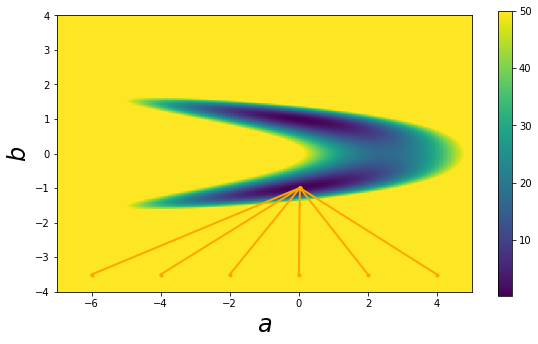

In [4]:
# Linear least square fit example:https://python4mpia.github.io/fitting_data/least-squares-fitting.html

import numpy,math
import scipy.optimize as optimization
import matplotlib.pyplot as plt

# Chose a model that will create bimodality.
def func(x, a, b):
    return a + b*b*x  # Term b*b will create bimodality.

# Create toy data for curve_fit.
xdata = numpy.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = numpy.array([0.1,0.9,2.2,2.8,3.9,5.1])
sigma = numpy.array([1.0,1.0,1.0,1.0,1.0,1.0])

# Compute chi-square manifold.
Steps = 101  # grid size
Chi2Manifold = numpy.zeros([Steps,Steps])  # allocate grid
amin = -7.0  # minimal value of a covered by grid
amax = +5.0  # maximal value of a covered by grid
bmin = -4.0  # minimal value of b covered by grid
bmax = +4.0  # maximal value of b covered by grid
for s1 in range(Steps):
    for s2 in range(Steps):
        # Current values of (a,b) at grid position (s1,s2).
        a = amin + (amax - amin)*float(s1)/(Steps-1)
        b = bmin + (bmax - bmin)*float(s2)/(Steps-1)
        # Evaluate chi-squared.
        chi2 = 0.0
        for n in range(len(xdata)):
            residual = (ydata[n] - func(xdata[n], a, b))/sigma[n]
            chi2 = chi2 + residual*residual
        Chi2Manifold[Steps-1-s2,s1] = chi2  # write result to grid.

# Plot grid.
plt.figure(1, figsize=(8,4.5))
plt.subplots_adjust(left=0.09, bottom=0.09, top=0.97, right=0.99)
# Plot chi-square manifold.
image = plt.imshow(Chi2Manifold, vmax=50.0,
              extent=[amin, amax, bmin, bmax])
# Plot where curve-fit is going to for a couple of initial guesses.
for a_initial in -6.0, -4.0, -2.0, 0.0, 2.0, 4.0:
    # Initial guess.
    x0   = numpy.array([a_initial, -3.5])
    xFit = optimization.curve_fit(func, xdata, ydata, x0, sigma)[0]
    plt.plot([x0[0], xFit[0]], [x0[1], xFit[1]], 'o-', ms=4,
                 markeredgewidth=0, lw=2, color='orange')
plt.colorbar(image)  # make colorbar
plt.xlim(amin, amax)
plt.ylim(bmin, bmax)
plt.xlabel(r'$a$', fontsize=24)
plt.ylabel(r'$b$', fontsize=24)
plt.show()

# A Perfect example for linear regression best fit

In [5]:
# Another example (the one that I understand well): 
# https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/

from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

# function for calculating slope
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    return m

m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


In [6]:
# function for calculating slope and intercept
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


x on the regression line is:  1.0 y on the regression line is:  4.600000000000002
x on the regression line is:  2.0 y on the regression line is:  4.900000000000001
x on the regression line is:  3.0 y on the regression line is:  5.2
x on the regression line is:  4.0 y on the regression line is:  5.499999999999999
x on the regression line is:  5.0 y on the regression line is:  5.799999999999998


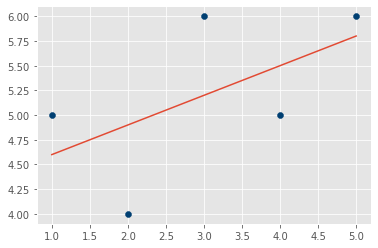

In [7]:
#regression_line = [(m*x)+b for x in xs]

regression_line = []
for x in xs:
    print('x on the regression line is: ',x,'y on the regression line is: ',(m*x)+b)
    regression_line.append((m*x)+b)
    
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

In [8]:
predict_x = 7

predict_y = (m*predict_x)+b
print(predict_y)

6.399999999999996


6.399999999999996


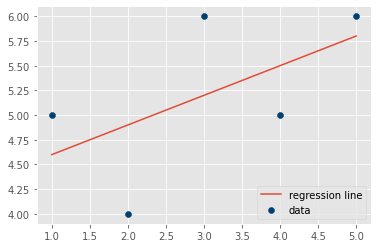

In [9]:
predict_x = 7
predict_y = (m*predict_x)+b
print(predict_y)

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

# An example for non-linear best fit

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


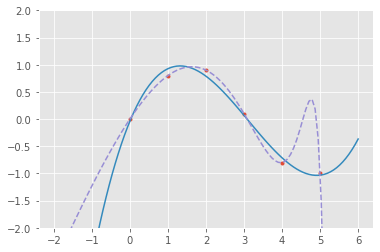

In [10]:
# http://apmonitor.com/che263/index.php/Main/PythonDataRegression
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

import numpy as np
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 3)
z

p = np.poly1d(z)
p(0.5)
p(3.5)
p(10)

p30 = np.poly1d(np.polyfit(x, y, 30))

p30(4)
p30(5)
p30(4.5)


import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 100)
plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)

plt.show()

In [11]:
# Another example for non-linear bestfit usng scipy

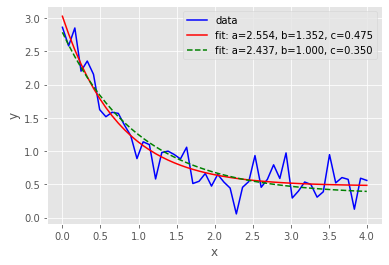

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Define the data to be fit with some noise:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


#Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Robust fitting

In [13]:
# https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49


# Anscombe Quartet

In [16]:
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet